In [1]:
# Data Preprocessing
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv("Country-data.csv")

In [3]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## Missing Values

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

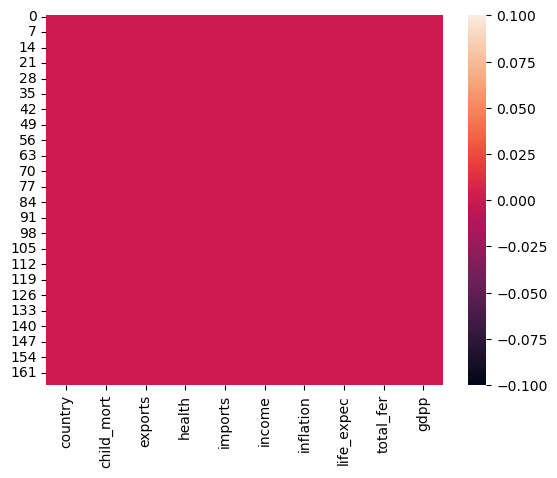

In [7]:
sns.heatmap(data.isnull())

## Univariate Analysis

In [8]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [9]:
data['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [10]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
# Indexing/Slicing to remove the first column 'Country'. 
data.columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
len(data.columns[1:])

9

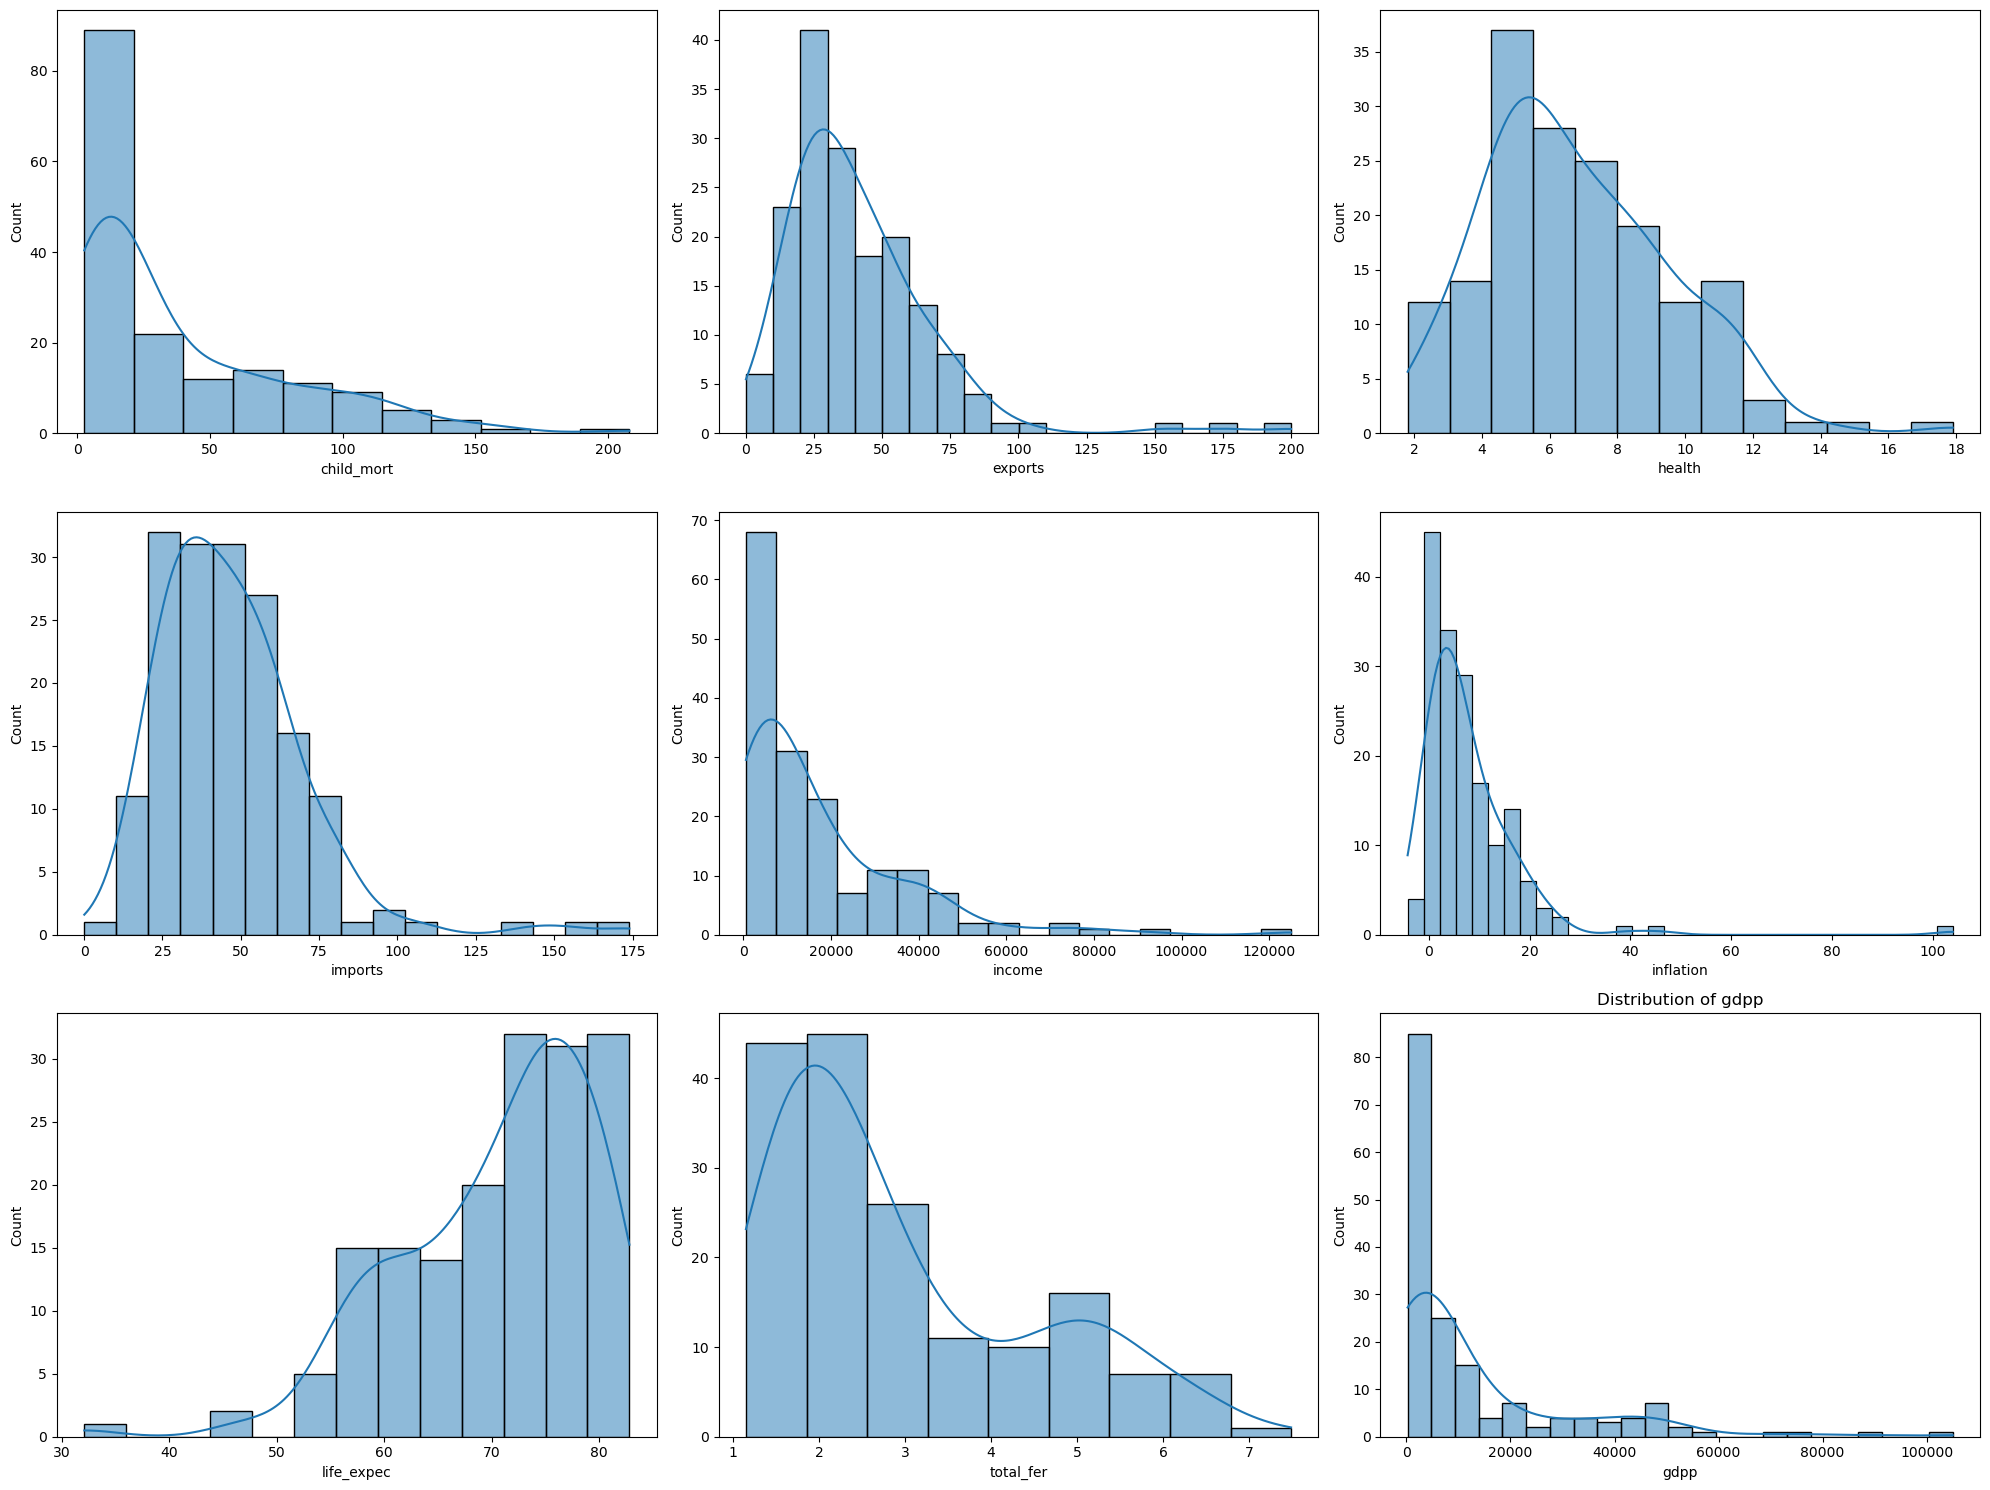

In [17]:
# Plotting distributions for each numerical feature - Eg 1
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
position = axes.flatten()

for index, column_name in enumerate(data.columns[1:]):
    sns.histplot(data[column_name], kde=True, ax=position[index])
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

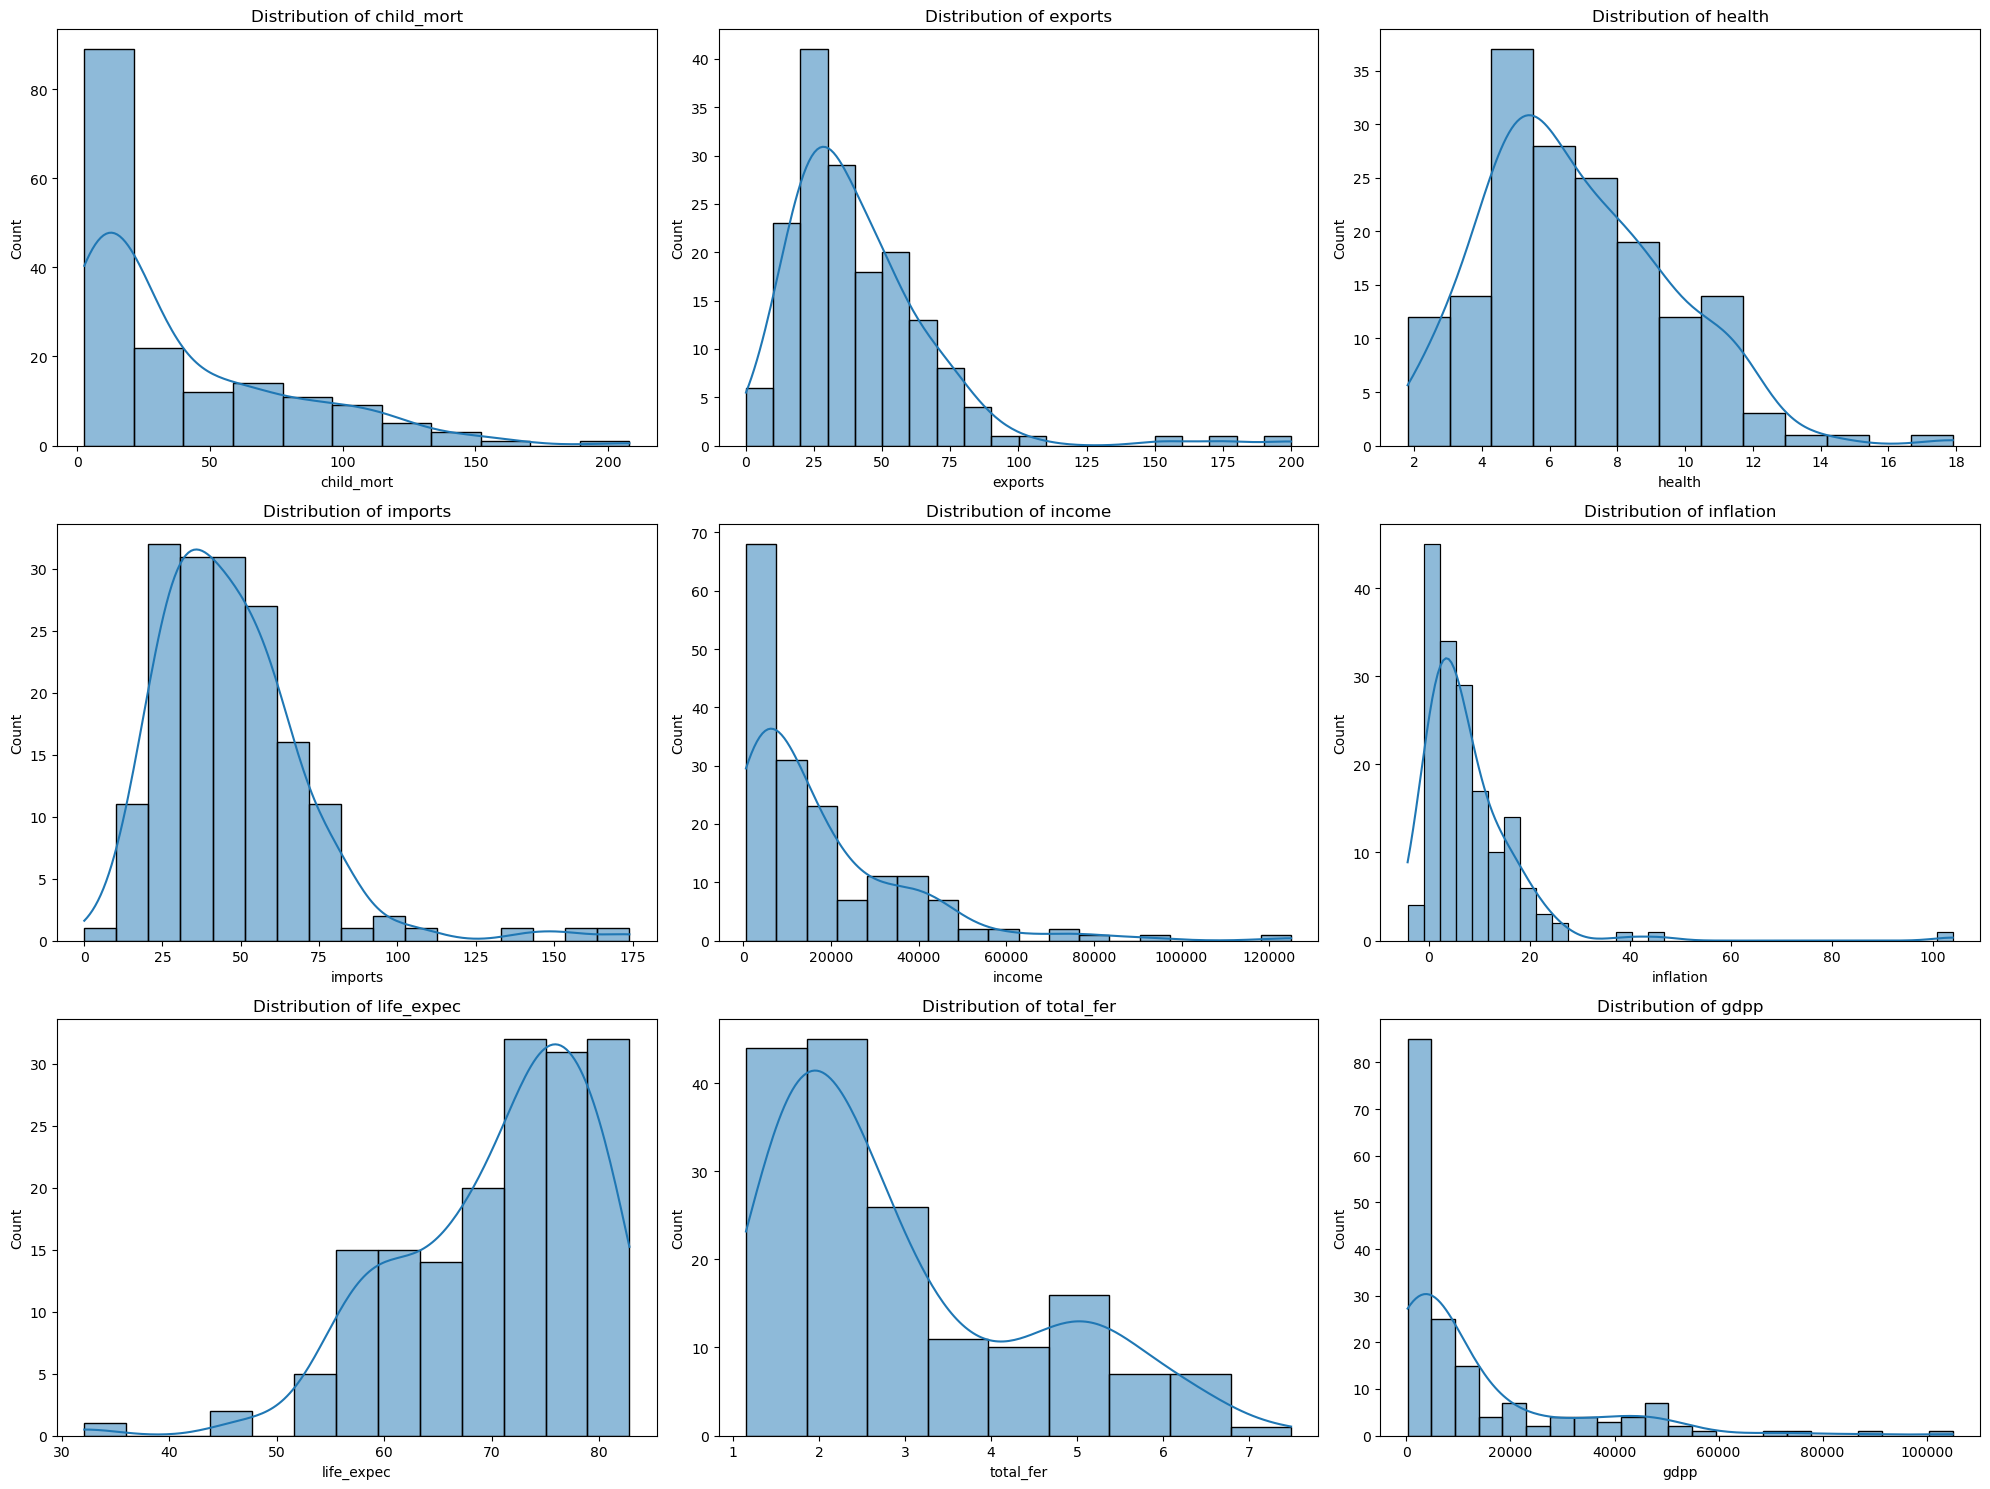

In [18]:
# Plotting distributions for each numerical feature - Eg 2
plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

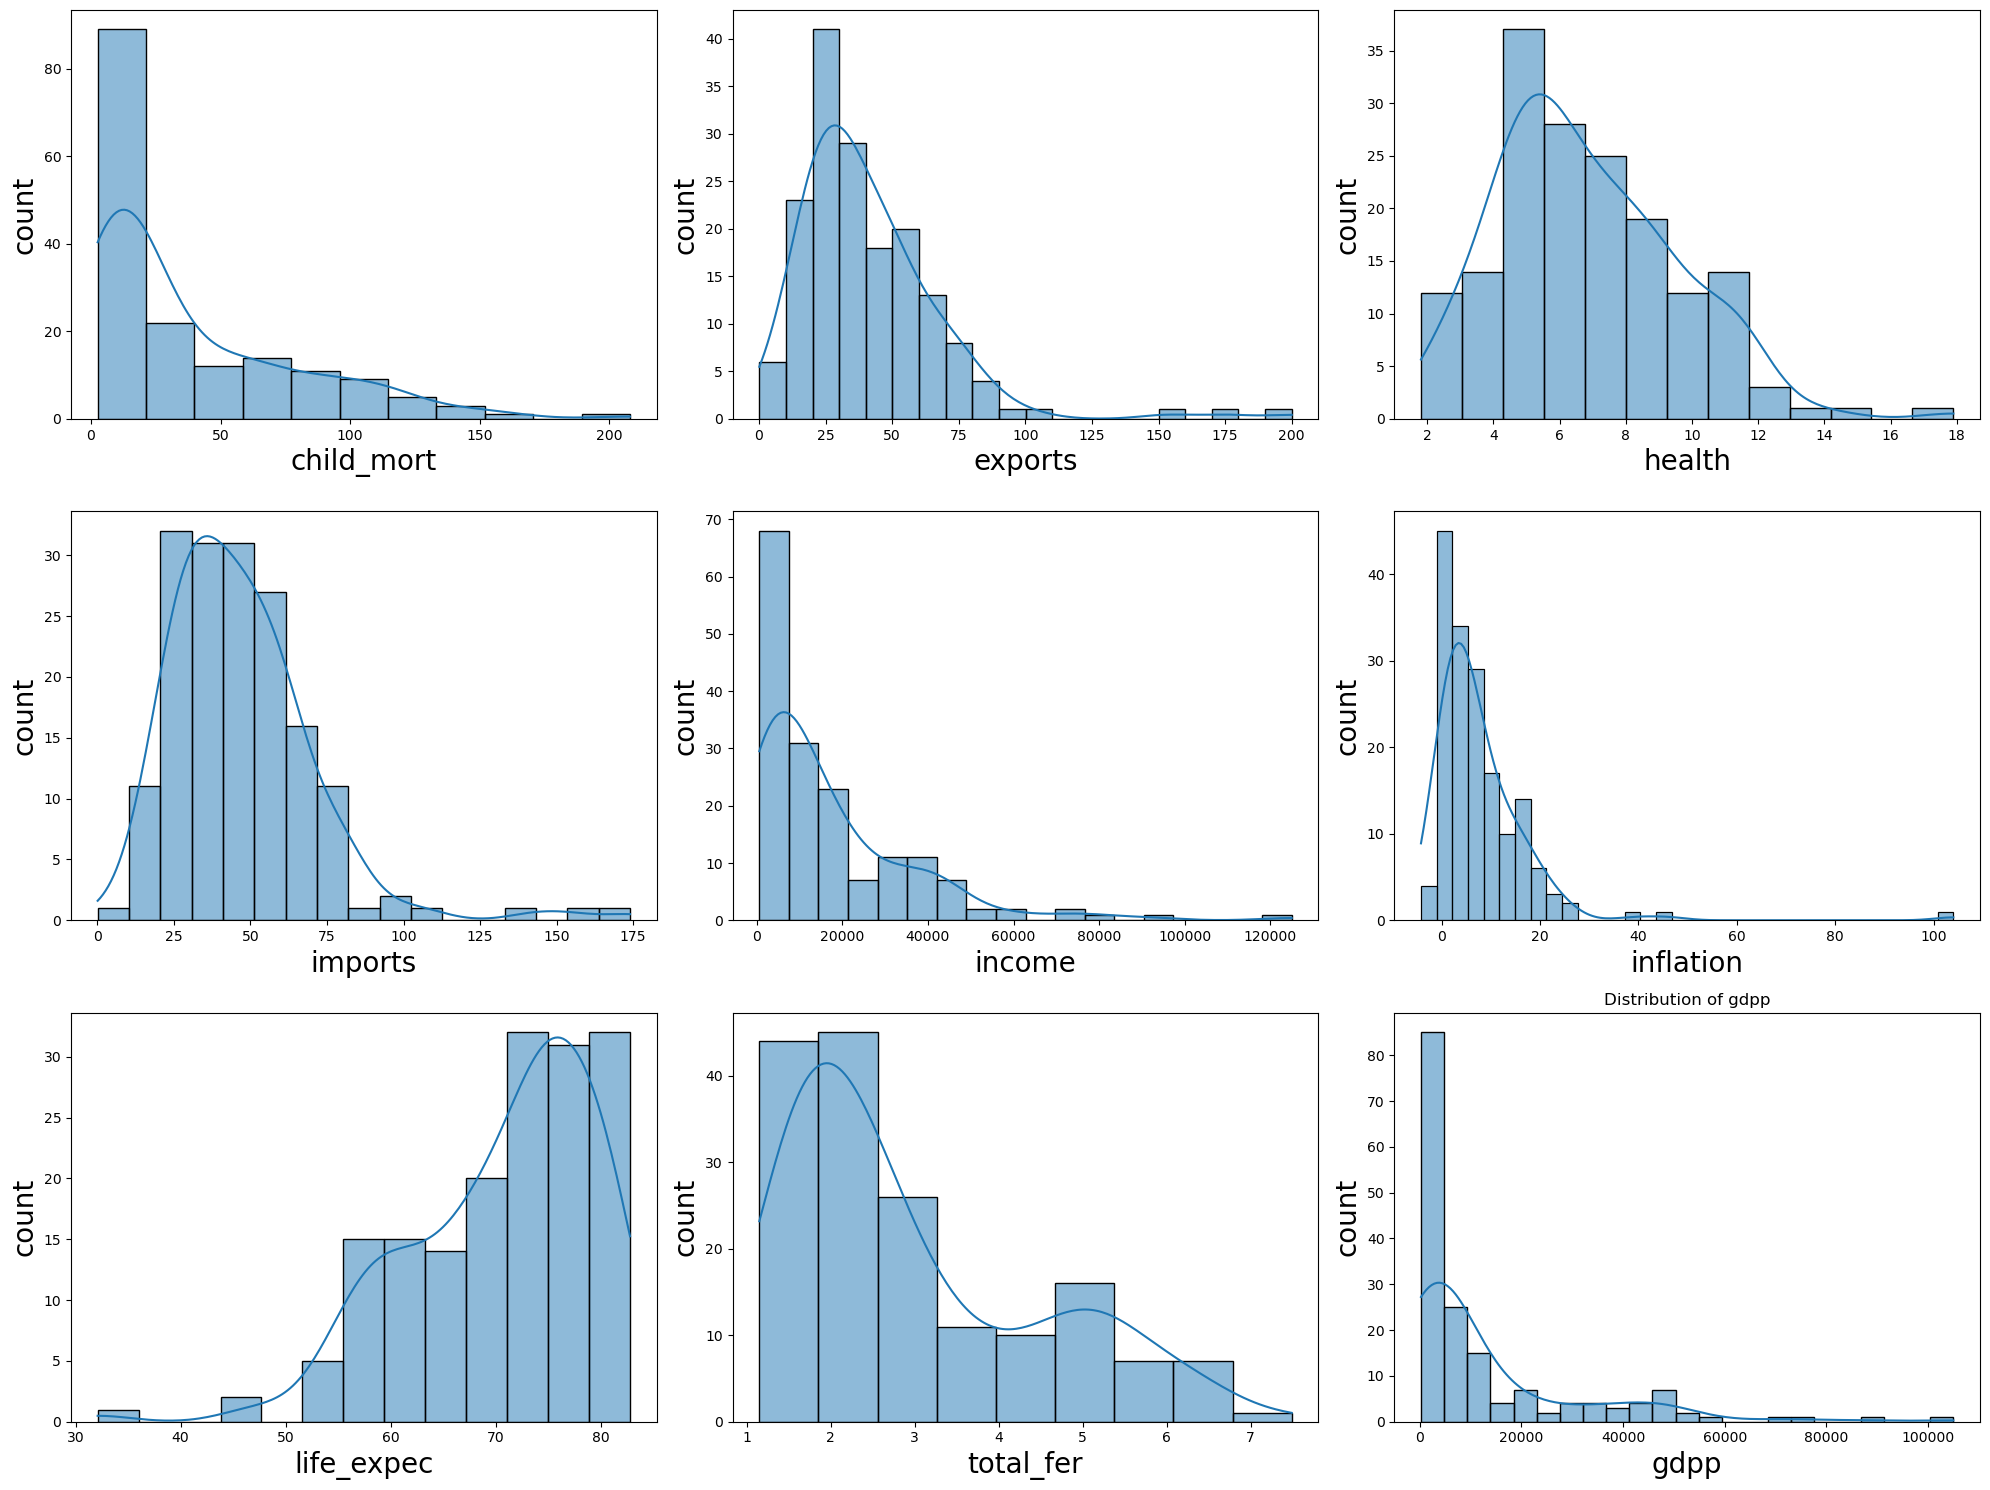

In [19]:
# Plotting distributions for each numerical feature - Eg 3 (increase visual size)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
position = axes.flatten()

for index, column_name in enumerate(data.columns[1:]):
    myplot = sns.histplot(data[column_name], kde=True, ax=position[index])
    plt.title(f"Distribution of {column_name}")
    myplot.set_xlabel(column_name, size=20)
    myplot.set_ylabel("count", size=20)

plt.tight_layout()
plt.show()

#### Insights:
- Child Mortality (child_mort):
  Right-skewed, most countries have low child mortality (below 50), but some exceed 100, indicating disparity in health outcomes. or indicating a higher frequency of lower child mortality rates.

- Exports (exports):
  Both are right-skewed, most countries have moderate export/import percentages (below 75%), but some exceed 100%, showing reliance on trade. or indicating most countries have lower export percentages.

- Health (health):
  Reight-skewed, most countries spend 4-8% of GDP on health, with some spending up to 16%, indicating differences in healthcare investments. Or Relatively symmetric distribution around the mean.

- Imports (imports):
  Slightly skewed right, similar to exports.

- Income (income):
  Heavily right-skewed, with most countries earning below $40,000, but a few wealthy countries show large disparities. Or Highly skewed right, with a few countries having significantly higher incomes.

- Inflation (inflation):
  Right-skewed, with most inflation rates below 20%, but some countries face hyperinflation (up to 100%). Or right-skewed, with some countries experiencing high inflation rates.

- Life Expectancy (life_expec):
  Left-skewed, most countries have a high life expectancy (60-80 years), with a few facing severe health challenges. Or Relatively symmetric distribution around the mean.

- Total Fertility Rate (total_fer):
  Right-skewed with most fertile rates between 2-4 children, but some over 5. Or Skewed right, with a higher frequency of lower fertility rates.

- GDP per capita (gdpp):
  Highly skewed, most countries have low GDP per capita, while a few are extremely wealthy. Or right, indicating a few countries with very high GDP per capita.

In [22]:
# To have your chart background a bit darken for clarity of graph
sns.set_style("darkgrid")

### Bivariate Analysis

In [20]:
data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

### Socio-economic Vs Health Metrics

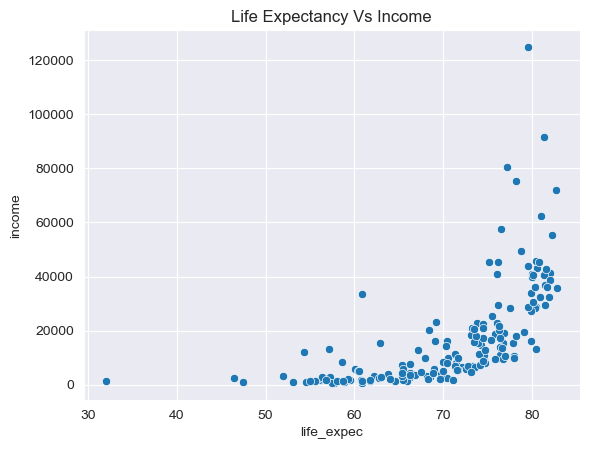

In [25]:
# Life Expectancy vs Income - 1

sns.scatterplot(x='life_expec', y='income', data=data)
plt.title("Life Expectancy Vs Income")
plt.show()

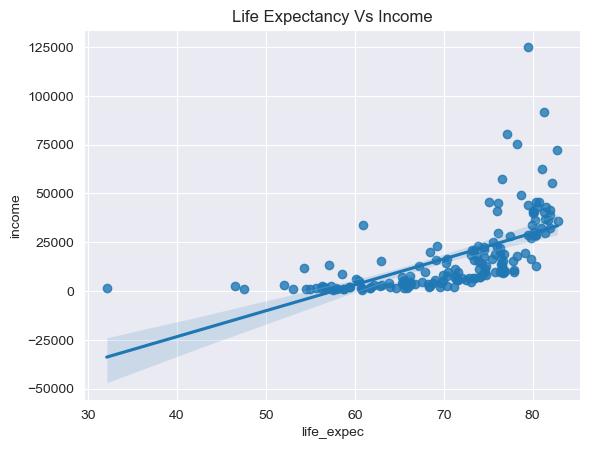

In [26]:
# Life Expectancy vs Income - More clarity of trend - 2

sns.regplot(x='life_expec', y='income', data=data)
plt.title("Life Expectancy Vs Income")
plt.show()

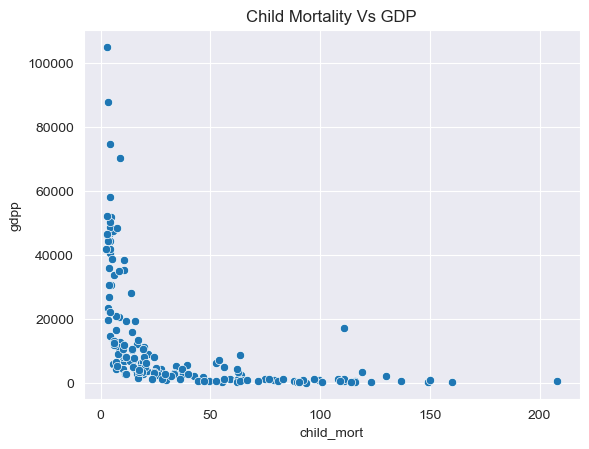

In [29]:
# GDP per capital vs Child Mortality - 1
sns.scatterplot(x='child_mort', y='gdpp', data=data)
plt.title("Child Mortality Vs GDP")
plt.show()

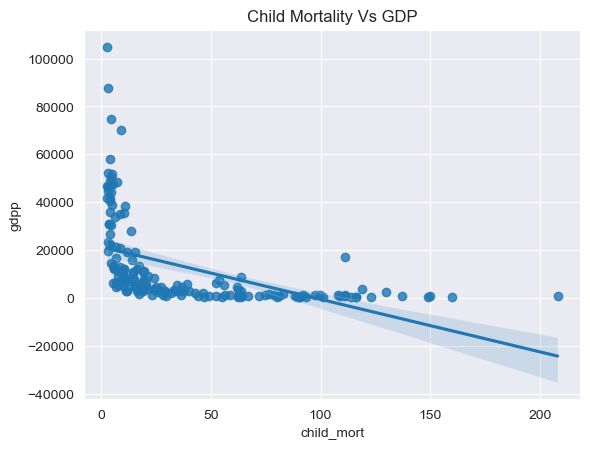

In [28]:
# GDP per capital vs Child Mortality - 2
sns.regplot(x='child_mort', y='gdpp', data=data)
plt.title("Child Mortality Vs GDP")
plt.show()

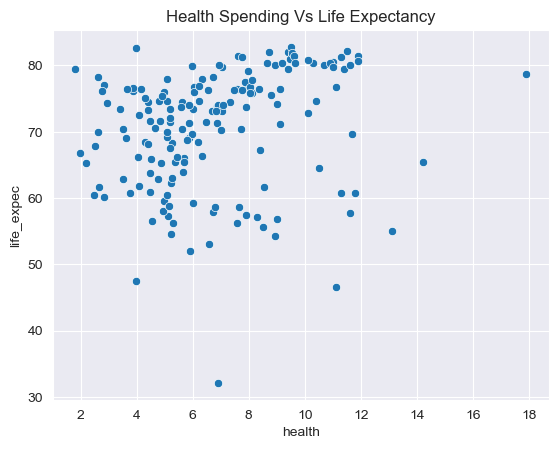

In [31]:
# Health Spending vs Life Expectancy
sns.scatterplot(x='health', y='life_expec', data=data)
plt.title("Health Spending Vs Life Expectancy")
plt.show()

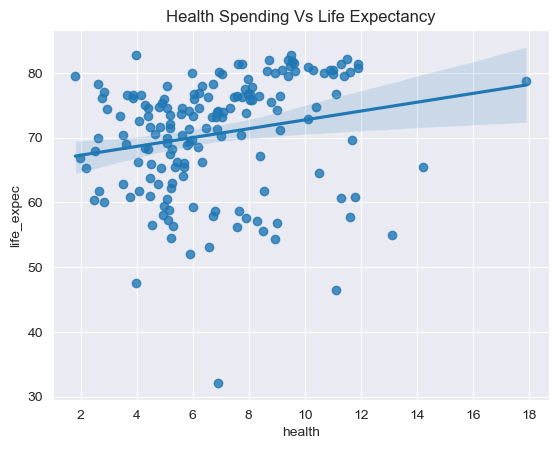

In [32]:
# Health Spending vs Life Expectancy - 2
sns.regplot(x='health', y='life_expec', data=data)
plt.title("Health Spending Vs Life Expectancy")
plt.show()

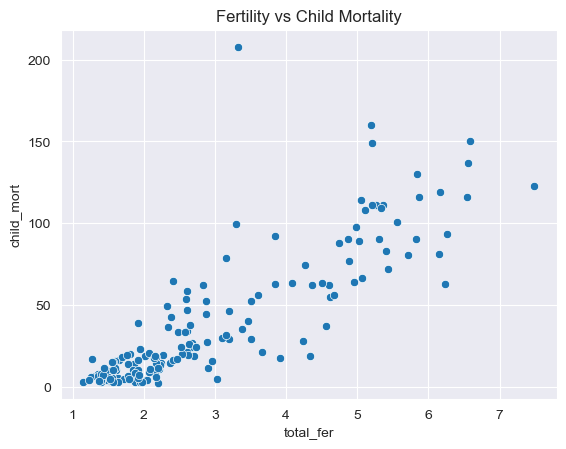

In [34]:
# Fertility Rate vs Child Mortality - 1
sns.scatterplot(x='total_fer', y='child_mort', data=data)
plt.title("Fertility vs Child Mortality")
plt.show()

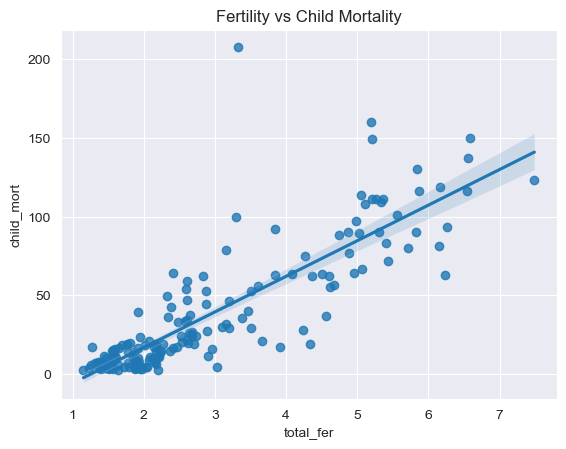

In [35]:
# Fertility Rate vs Child Mortality - 2
sns.regplot(x='total_fer', y='child_mort', data=data)
plt.title("Fertility vs Child Mortality")
plt.show()

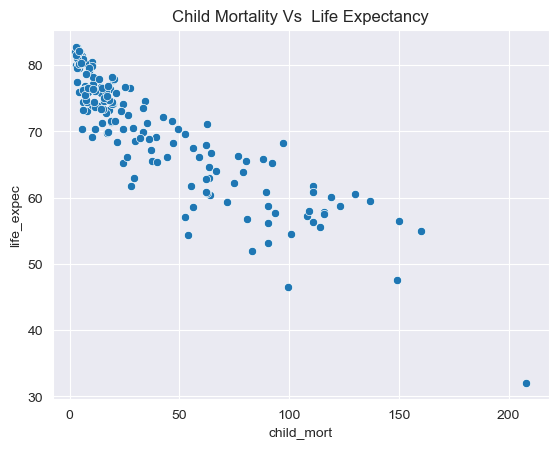

In [36]:
# Child Mortality Vs Life Expectancy - 1

sns.scatterplot(x='child_mort', y='life_expec', data=data)
plt.title("Child Mortality Vs  Life Expectancy")
plt.show()

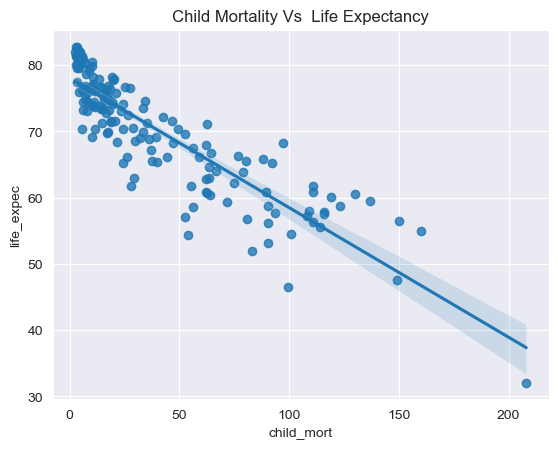

In [37]:
# Child Mortality Vs Life Expectancy - 2

sns.regplot(x='child_mort', y='life_expec', data=data)
plt.title("Child Mortality Vs  Life Expectancy")
plt.show()

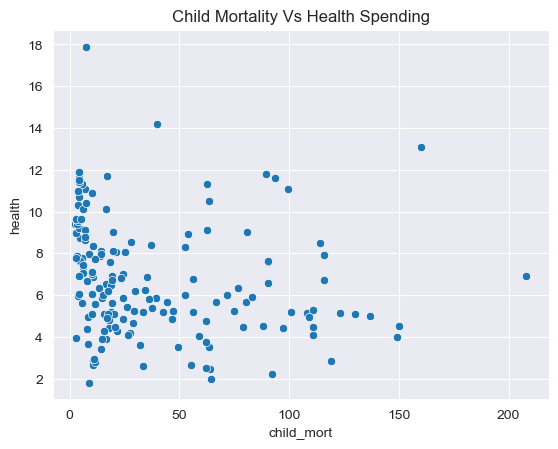

In [39]:
# Child Mortality Vs Health Spending - 1

sns.scatterplot(x='child_mort', y='health', data=data)
plt.title("Child Mortality Vs Health Spending")
plt.show()

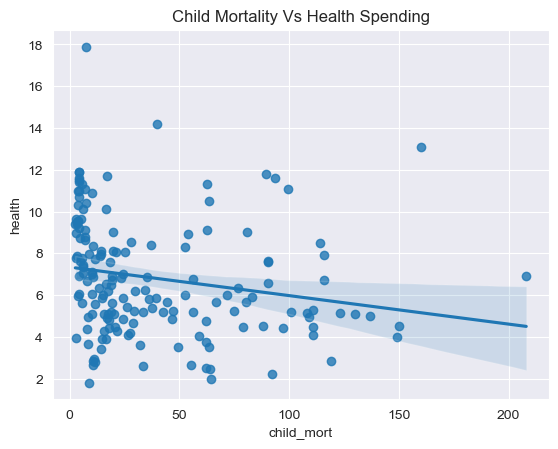

In [40]:
# Child Mortality Vs Health Spending - 2

sns.regplot(x='child_mort', y='health', data=data)
plt.title("Child Mortality Vs Health Spending")
plt.show()

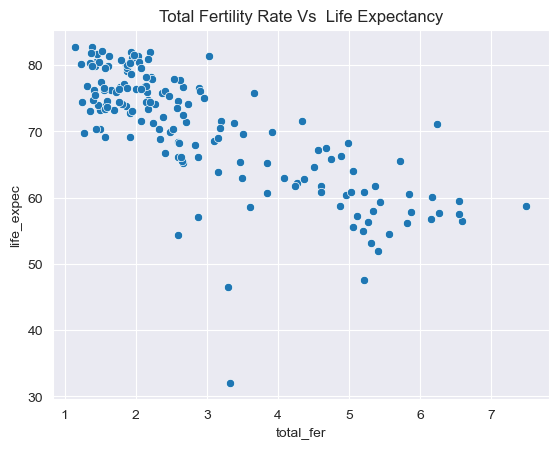

In [42]:
# Total Fertility Rate Vs Life Expectancy - 1

sns.scatterplot(x='total_fer', y='life_expec', data=data)
plt.title("Total Fertility Rate Vs  Life Expectancy")
plt.show()

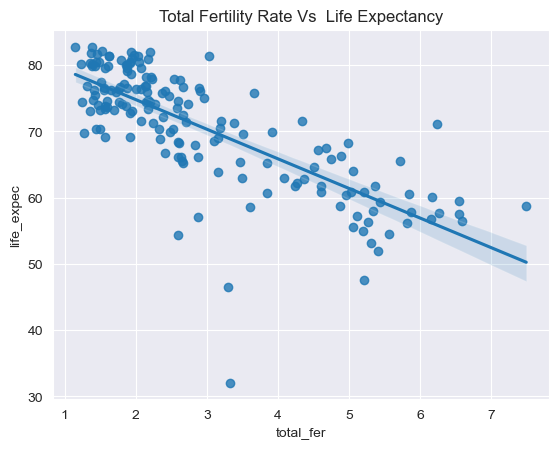

In [41]:
# Total Fertility Rate Vs Life Expectancy - 2

sns.regplot(x='total_fer', y='life_expec', data=data)
plt.title("Total Fertility Rate Vs  Life Expectancy")
plt.show()

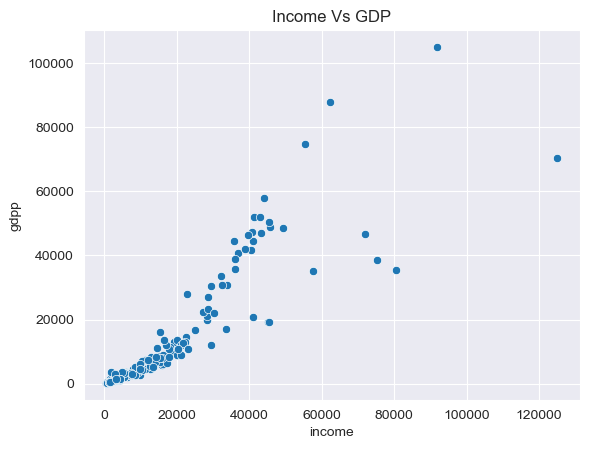

In [43]:
# Income vs GDP - 1
sns.scatterplot(x='income', y='gdpp', data=data)
plt.title("Income Vs GDP")
plt.show()

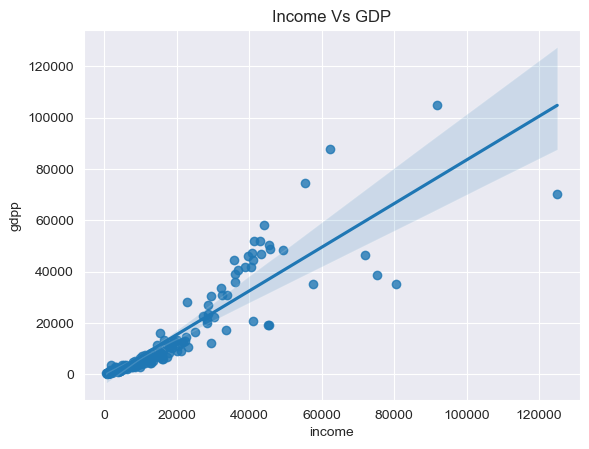

In [44]:
# Income vs GDP - 2
sns.regplot(x='income', y='gdpp', data=data)
plt.title("Income Vs GDP")
plt.show()

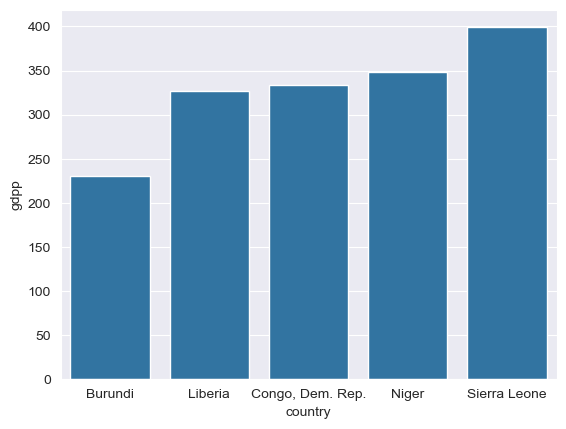

In [53]:
# Top 5 Country's GDP
sns.barplot(x='country', y='gdpp', data=data.sort_values(by="gdpp")[:5])

plt.show()

In [54]:
# More correlation can be done between other features like Import vs Export etc. 

In [55]:
len(data)

167

In [56]:
167 - 5

162

In [57]:
162 // 2

81

#### Countries with the heighest mortality rate - Top 5

In [59]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [58]:
data.sort_values(by='child_mort', ascending=False)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
..                        ...         ...      ...     ...      ...     ...   
53                    Finland         3.0     38.7    8.95     37.4   39800   
144                    Sweden         3.0     46.2    9.63     40.7   42900   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
91                 Luxembourg         2.8    175.0    7.77    142.0   91700   
68                    Iceland         2.6     53.4    9.40     43.3   38800   

     inflation  life_expec  total_fer    gdpp  
66       5.450        32.1       3.33     662  
132     17.200        55.0       5.20     399  
32       6.390        56.5       6.59     897  
31       2.010        47.5       5.21     446  
97       4.370        59.5       6.55     708  
..         ...         ...        ...     ...  
53       0.351        80.0       1.87   46200  
144      0.991        81.5       1.98   52100  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
68       5.470        82.0       2.20   41900  

[167 rows x 10 columns]

In [62]:
data.sort_values(by='child_mort', ascending=False).head() # Example 1

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708

In [63]:
data.sort_values(by='child_mort', ascending=False)[:5] # Example 2

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708

In [64]:
top_5_child_mort = data.sort_values(by='child_mort', ascending=False)[:5]

In [65]:
top_5_child_mort

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708

In [66]:
least_5_child_mort = data.sort_values(by='child_mort')[:5]

In [67]:
least_5_child_mort

country  child_mort  exports  health  imports  income  inflation  \
68      Iceland         2.6     53.4    9.40     43.3   38800      5.470   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
53      Finland         3.0     38.7    8.95     37.4   39800      0.351   
144      Sweden         3.0     46.2    9.63     40.7   42900      0.991   

     life_expec  total_fer    gdpp  
68         82.0       2.20   41900  
91         81.3       1.63  105000  
133        82.7       1.15   46600  
53         80.0       1.87   46200  
144        81.5       1.98   52100

### Representing the Top 5 and Least 5 graphically 

In [68]:
import warnings

warnings.filterwarnings("ignore")

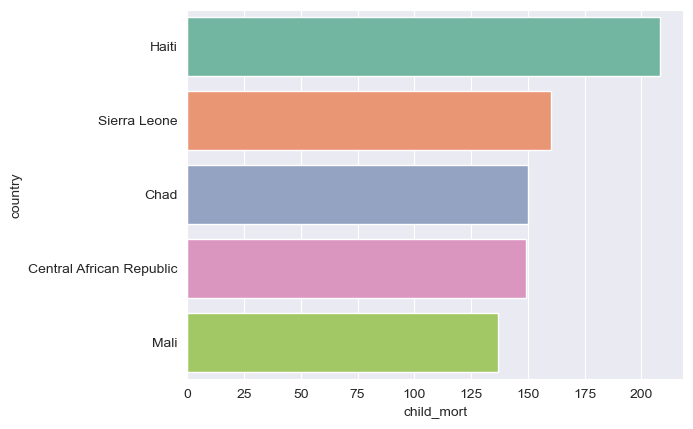

In [71]:
sns.barplot(x ='child_mort', y ='country', data=top_5_child_mort, orient="h", palette='Set2');

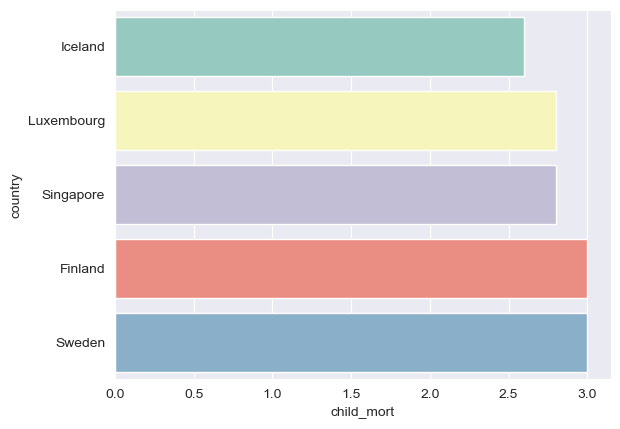

In [72]:
sns.barplot(x ='child_mort', y ='country', data=least_5_child_mort, orient="h", palette='Set3');

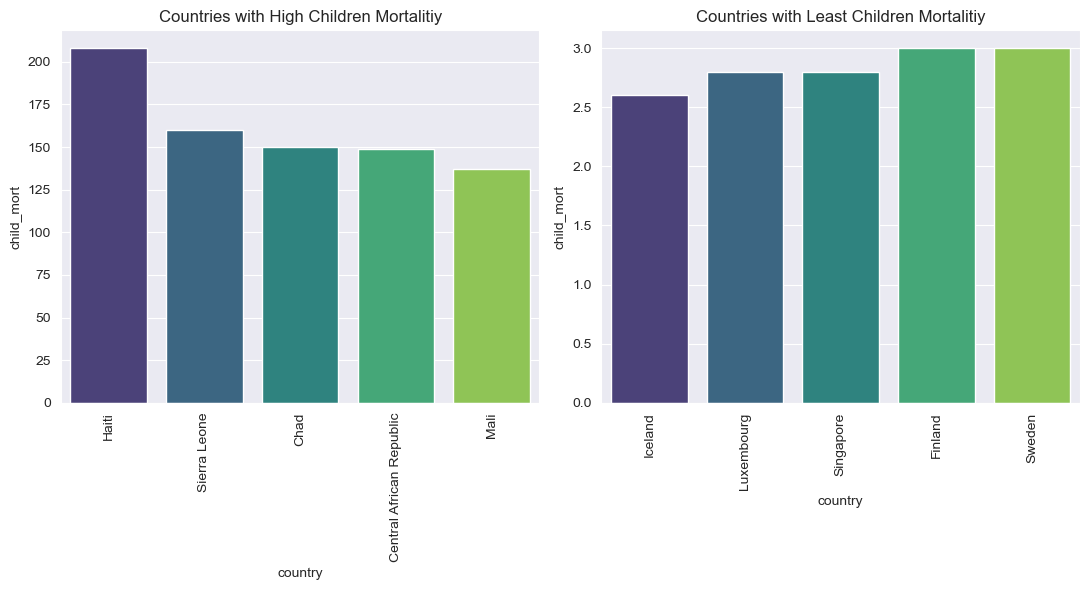

In [73]:
plt.figure(figsize=(11, 6))
plt.subplot(1,2,1)
sns.barplot(x ='country', y ='child_mort', data=top_5_child_mort, palette='viridis')
plt.title('Countries with High Children Mortalitiy')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x ='country', y ='child_mort', data=least_5_child_mort, palette='viridis')
plt.title('Countries with Least Children Mortalitiy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## TODO: - Task???
Perform bivariate EDA on the following:

1. Countries Exports levels (High, Least)
2. Countries Health Spending levels (High, Least)
3. Countries Life Expectancy levels (High, Least)
4. Countries Female Fertility Rate levels (High, Least)
5. Countries GDP Contribution /Person levels (High, Least)

### Multivariate Analysis

In [74]:
data.select_dtypes(exclude='object').corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

In [75]:
numerical_data_corr = data.select_dtypes(exclude='object').corr()

In [80]:
numerical_data_corr.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

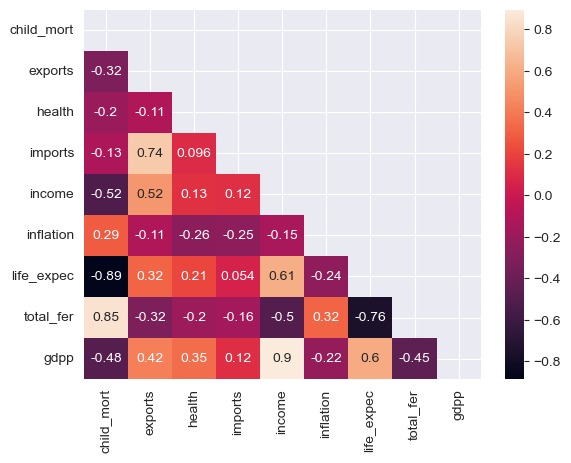

In [85]:
sns.heatmap(numerical_data_corr, annot=True, mask=np.triu(numerical_data_corr))
plt.show()

### Feature Engineering

##### Some features belong to similar categories and behave similarly with features from other categories:

##### Lets create new features that fall into the three categories:

1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

### Health Metrics
* Child Mortality (child_mort): Higher values outcomes, so we want to invert this relationship.
* Life Expectancy (life_expec): Higher values are positive indicators of health.
* Health Spending (health): Higher values indicate better health investment, so this should be a postive contributor. 
* Total Fertility Rate (total_fer): This can indicate population growth, but higher rates might also suggest challenges in health outcomes. 

### Finance Metrics

* Income (income): Higher values indicate better economic health.
* GDP per capital (gdpp): Also a positive economic indicator.
* Inflation (inflation): Higher inflation is generally negative for finacial health. 

In [110]:
data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [111]:
data[['child_mort', 'health', 'life_expec', 'total_fer']]

child_mort  health  life_expec  total_fer
0          90.2    7.58        56.2       5.82
1          16.6    6.55        76.3       1.65
2          27.3    4.17        76.5       2.89
3         119.0    2.85        60.1       6.16
4          10.3    6.03        76.8       2.13
..          ...     ...         ...        ...
162        29.2    5.25        63.0       3.50
163        17.1    4.91        75.4       2.47
164        23.3    6.84        73.1       1.95
165        56.3    5.18        67.5       4.67
166        83.1    5.89        52.0       5.40

[167 rows x 4 columns]

In [112]:
new_data = pd.DataFrame()

In [113]:

new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) + 
                      (data['health'] / data['health'].mean()) - 
                      (data['child_mort'] / data['child_mort'].mean()) - 
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())  

In [114]:
new_data

Health     Trade   Finance
0   -2.422504  1.200812 -1.076519
1    1.048966  1.717580  0.317688
2    0.002385  1.603752 -0.972476
3   -3.929096  2.430387 -2.262080
4    0.981553  2.362940  1.870058
..        ...       ...       ...
162 -0.287065  2.257474  0.064477
163  0.504365  1.068624 -3.894624
164  0.769324  3.461820 -1.191967
165 -1.338566  1.463396 -2.670352
166 -2.401994  1.559033 -1.495131

[167 rows x 3 columns]

In [33]:
new_data.head()

Health     Trade   Finance
0 -2.422504  1.200812 -1.076519
1  1.048966  1.717580  0.317688
2  0.002385  1.603752 -0.972476
3 -3.929096  2.430387 -2.262080
4  0.981553  2.362940  1.870058

### Feature Scaling

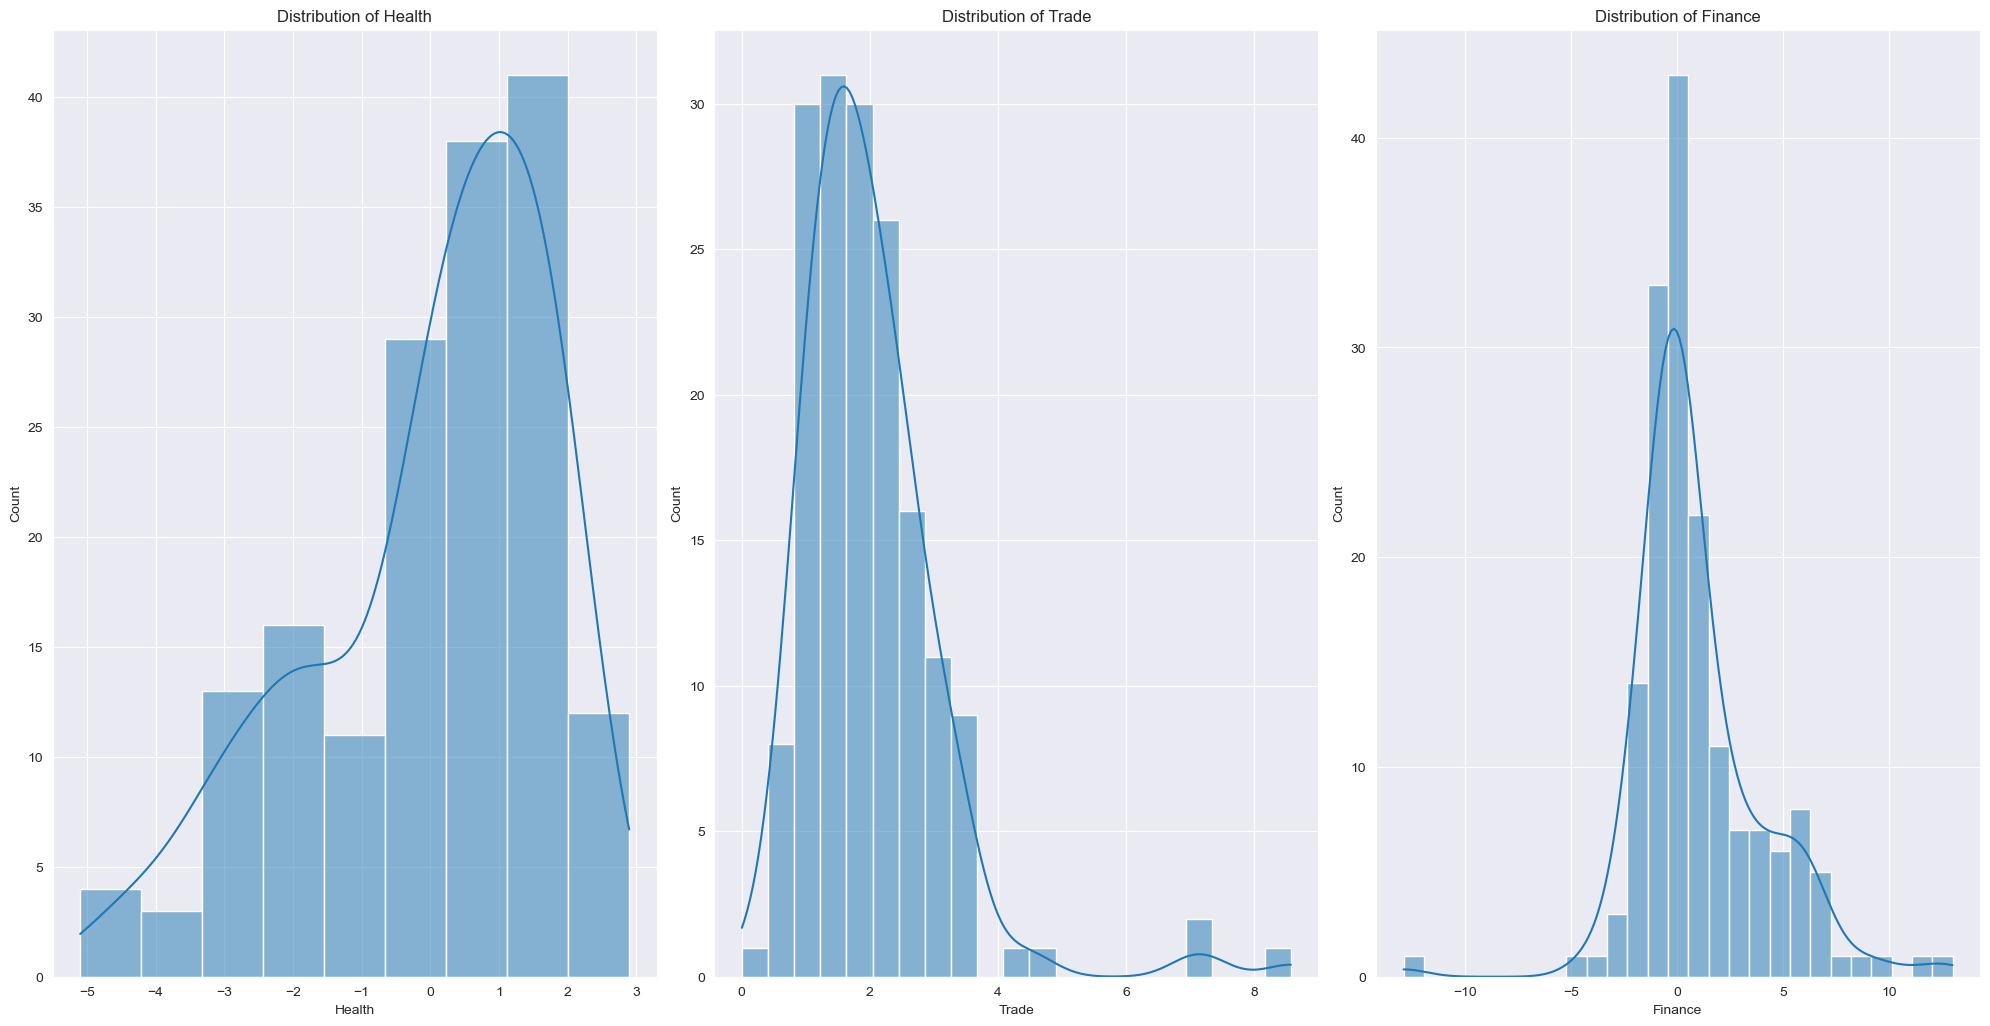

In [127]:
# Plotting distributions for each numerical feature - 1
plt.figure(figsize=(20, 30))

for i, column in enumerate(new_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


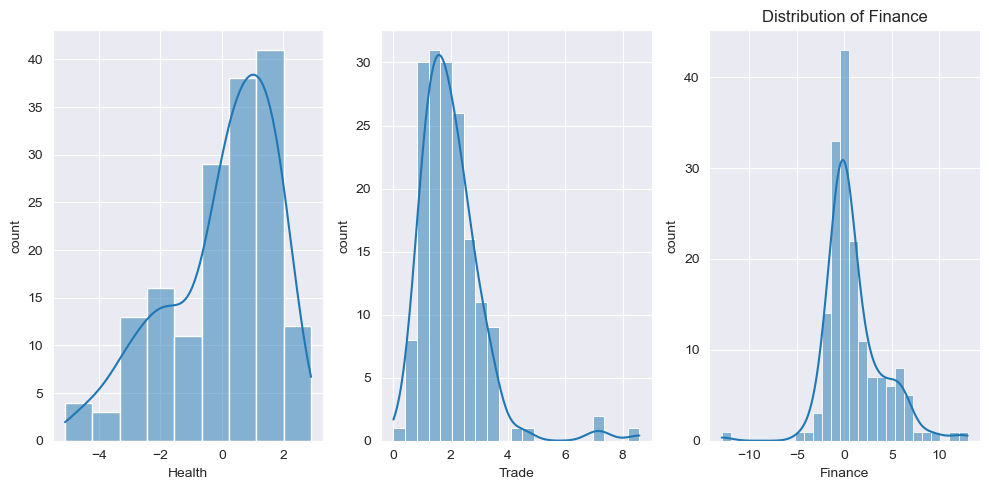

In [128]:
# Plotting distributions for each numerical feature - 2
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
position = axes.flatten()

for index, column_name in enumerate(new_data):
    myplot = sns.histplot(new_data[column_name], kde=True, ax=position[index])
    plt.title(f'Distribution of {column_name}')
    myplot.set_xlabel(column_name, size=10)
    myplot.set_ylabel("count", size=10)
    
plt.tight_layout()
plt.show()

In [130]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler() # Standardization

In [131]:
new_data['Finance'] = scaler.fit_transform(new_data[['Finance']])

In [132]:
new_data['Trade'] = scaler.fit_transform(new_data[['Trade']])
new_data['Health'] = scaler.fit_transform(new_data[['Health']])

In [133]:
# from sklearn.preprocessing import RobustScaler

# # Standardize the features
# scaler = RobustScaler()

# for col in new_data:
#     new_data[col] = scaler.fit_transform(new_data[[col]])

In [134]:
new_data

Health     Trade   Finance
0   -1.384975 -0.726043 -0.684496
1    0.599706 -0.256572 -0.224915
2    0.001363 -0.359982 -0.650200
3   -2.246312  0.390996 -1.075300
4    0.561166  0.329722  0.286803
..        ...       ...       ...
162 -0.164119  0.233909 -0.308383
163  0.288352 -0.846133 -1.613446
164  0.439832  1.328029 -0.722552
165 -0.765274 -0.487492 -1.209881
166 -1.373249 -0.400608 -0.822486

[167 rows x 3 columns]

## Modelling (K-Means)

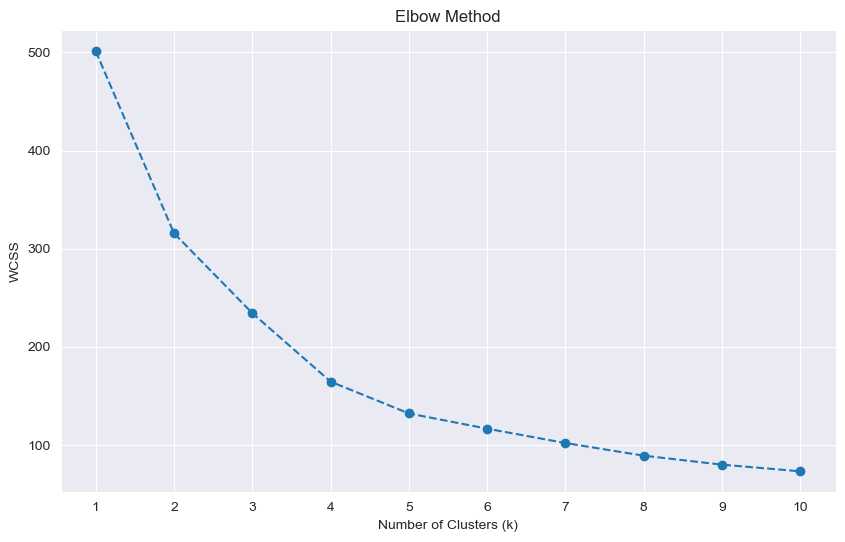

In [162]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Trying k from 1 to 10
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(new_data)
    wcss.append(model.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [163]:
# Choose the number of clusters (k)
k = 3 # Number of clusters
model = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Apply K-Means algorithm to the scaled features
model.fit(new_data)

KMeans(n_clusters=3, random_state=42)

In [164]:
cluster = model.cluster_centers_

In [165]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [166]:
data['Class'] = model.labels_

In [167]:
data['Class'].value_counts()

Class
0    84
1    42
2    41
Name: count, dtype: int64

In [168]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Class  
0       9.44        56.2       5.82    553      1  
1       4.49        76.3       1.65   4090      0  
2      16.10        76.5       2.89   4460      0  
3      22.40        60.1       6.16   3530      1  
4       1.44        76.8       2.13  12200      0

In [169]:
data['Class'].value_counts()

Class
0    84
1    42
2    41
Name: count, dtype: int64

### Visualization

Since we know low income and high child mortality are related

Lets plot Income and Child mortality w.r.t class predictions

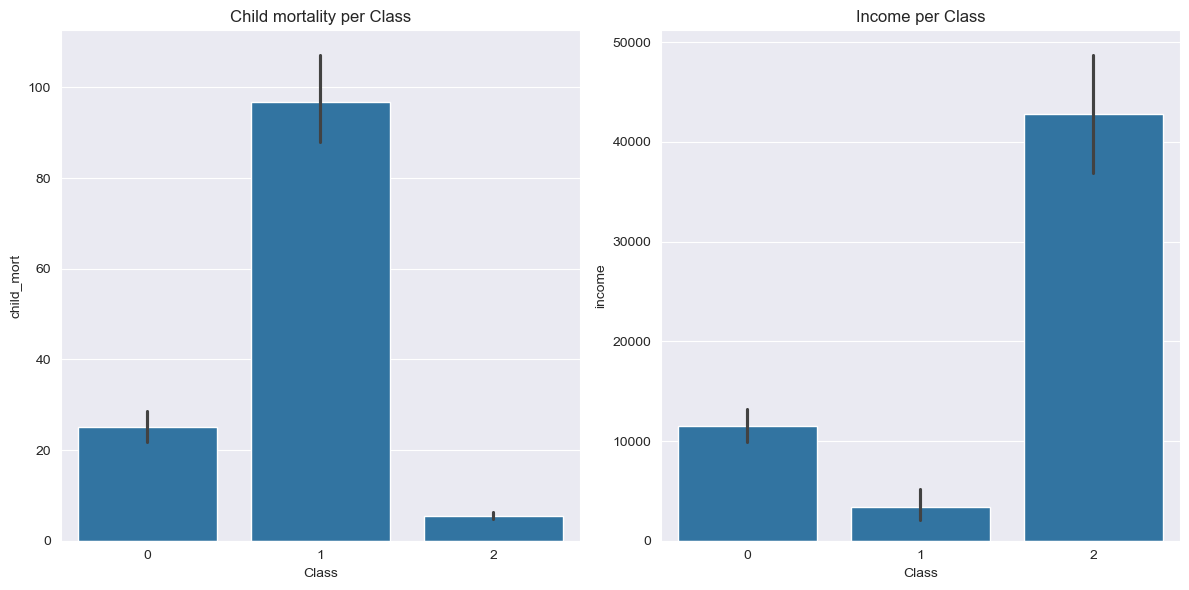

In [170]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='Class', y='child_mort', data=data) 
plt.title('Child mortality per Class')

plt.subplot(1,2,2)
sns.barplot(x='Class', y='income', data=data)
plt.title('Income per Class')

plt.tight_layout()
plt.show()

It is clear to conclude that:

0 : Not a priority <br>
1 : High priority (Requires foreign aid) <br>
2 : Do NOT requires foreign aid <br>

#### Lets rename the class

In [171]:
data[data['Class'] == 1]['Class']

0      1
3      1
17     1
25     1
26     1
28     1
31     1
32     1
36     1
37     1
38     1
40     1
49     1
50     1
55     1
56     1
59     1
63     1
64     1
66     1
69     1
80     1
84     1
88     1
93     1
94     1
97     1
99     1
106    1
107    1
112    1
113    1
116    1
129    1
132    1
142    1
147    1
149    1
150    1
155    1
165    1
166    1
Name: Class, dtype: int32

In [172]:
data['Class'][data['Class'] == 0]= "Not a priority"

In [173]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp           Class  
0       9.44        56.2       5.82    553               1  
1       4.49        76.3       1.65   4090  Not a priority  
2      16.10        76.5       2.89   4460  Not a priority  
3      22.40        60.1       6.16   3530               1  
4       1.44        76.8       2.13  12200  Not a priority

In [174]:
data['Class'][data['Class'] == 1]= "High priority (Requires foreign aid)"
data['Class'][data['Class'] == 2]= "Do NOT requires foreign aid"

In [175]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  \
0       9.44        56.2       5.82    553   
1       4.49        76.3       1.65   4090   
2      16.10        76.5       2.89   4460   
3      22.40        60.1       6.16   3530   
4       1.44        76.8       2.13  12200   

                                  Class  
0  High priority (Requires foreign aid)  
1                        Not a priority  
2                        Not a priority  
3  High priority (Requires foreign aid)  
4                        Not a priority

### Lets plot an interactive GeoMAP showing these categories

In [177]:
import plotly.express as px

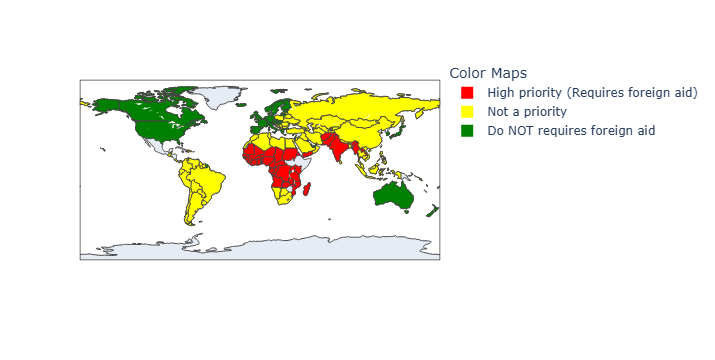

In [178]:
fig = px.choropleth(data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = data['Class'],  
                    color_discrete_map = {'High priority (Requires foreign aid)':'Red',
                                        'Do NOT requires foreign aid':'Green',
                                        'Not a priority':'Yellow'}
                   )
fig.update_layout(legend_title_text = 'Color Maps')
fig.show()

In [1]:
#### To save image in python - 
# plt.savefig("confusion_matrix.png")

#### You can play with the model, using 3 clusters, or using other features like gdp, income, child mortality etc. 